In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import os

folder = '../data/processed'
filename = 'dataset_final.csv'
file_path = os.path.join(folder, filename)

try:
    df = pd.read_csv(
        file_path,
        sep=',',
        decimal='.'
    )
    df = df.sort_values(by='DIA', ignore_index=True)
    df = df.drop(columns=['DIA'])
    print(f"✅ DataFrame cargado exitosamente desde: {file_path}")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ Error al leer el archivo: {e}")

✅ DataFrame cargado exitosamente desde: ../data/processed\dataset_final.csv
Dimensiones: (1184, 317)

Primeras 5 filas:
   EE Planta / Hl  EE Elaboracion / Hl  EE Bodega / Hl  EE Cocina / Hl  \
0      642.727209            47.145349       69.023256        0.000000   
1        7.767254             0.769609        0.798838        0.319229   
2        8.801205             0.862593        0.835762        0.260924   
3        5.175639             0.439225        0.371077        0.258048   
4        7.924665             0.802365        0.717787        0.301592   

   EE Envasado / Hl  EE Linea 2 / Hl  EE Linea 3 / Hl  EE Linea 4 / Hl  \
0         13.813953        14.578784         0.000000         0.000000   
1          2.358593         4.158962         1.506838         1.521823   
2          1.985462        39.076667         1.448962         1.500923   
3          1.442114         4.348182         1.355238         1.536507   
4          1.664726         5.125920         2.704348         1.4

In [2]:
info_df = pd.DataFrame({
    'columna': df.columns,
    'non_nulls': df.notnull().sum(),
    'dtype': df.dtypes.astype(str)
}).reset_index(drop=True)

pd.set_option('display.max_rows', None)  # muestra todas
print(info_df)


                             columna  non_nulls    dtype
0                     EE Planta / Hl       1184  float64
1                EE Elaboracion / Hl       1184  float64
2                     EE Bodega / Hl       1184  float64
3                     EE Cocina / Hl       1184  float64
4                   EE Envasado / Hl       1184  float64
5                    EE Linea 2 / Hl       1184  float64
6                    EE Linea 3 / Hl       1184  float64
7                    EE Linea 4 / Hl       1184  float64
8                  EE Servicios / Hl       1184  float64
9                   EE Sala Maq / Hl       1184  float64
10                      EE Frio / Hl       1184  float64
11                      EE Aire / Hl       1184  float64
12                       EE CO2 / Hl       1184  float64
13                   EE Caldera / Hl       1184  float64
14                      EE Eflu / Hl       1184  float64
15                      EE Agua / Hl       1184  float64
16                EE Resto Serv

In [3]:
def columnas_con_nan(df, nombre_archivo="columnas_con_nan.csv"):

    # Contar valores faltantes por columna
    nans_por_columna = df.isna().sum()
    
    # Filtrar solo las columnas con al menos un NaN
    columnas_con_nan = nans_por_columna[nans_por_columna > 0].sort_values(ascending=False)
    
    if columnas_con_nan.empty:
        print("✅ No hay columnas con valores faltantes.")
        return pd.DataFrame(columns=["columna", "cantidad_nan"])
    
    print(f"🔍 Se encontraron {len(columnas_con_nan)} columnas con valores faltantes:\n")
    print(columnas_con_nan)
    
    # Convertir a DataFrame más claro
    resultado = columnas_con_nan.reset_index()
    resultado.columns = ["columna", "cantidad_nan"]
    
    
    return resultado

# --- Ejemplo de uso ---
resultado = columnas_con_nan(df)


✅ No hay columnas con valores faltantes.


Por fortuna, no hay valores nulos presentes en el dataset. Verifiquemos ahora los ceros y los valores negativos.

In [4]:
def columnas_con_negativos(df):

    df_num = df.select_dtypes(include=["number"])

    negativos = (df_num < 0).sum()

    cols_negativas = negativos[negativos > 0].sort_values(ascending=False)
    
    if cols_negativas.empty:
        print("✅ No se encontraron columnas con valores negativos.")
        return pd.DataFrame(columns=["columna", "cantidad_negativos"])
    else:
        print("⚠️ Columnas con valores negativos:")
        return cols_negativas.to_frame(name="cantidad_negativos")
    

def columnas_con_ceros(df):

    df_num = df.select_dtypes(include=["number"])

    negativos = (df_num == 0).sum()

    cols_negativas = negativos[negativos > 0].sort_values(ascending=False)
    
    if cols_negativas.empty:
        print("✅ No se encontraron columnas con valores cero.")
        return pd.DataFrame(columns=["columna", "cantidad_ceros"])
    else:
        print("⚠️ Columnas con valores cero:")
        return cols_negativas.to_frame(name="cantidad_ceros")

cols_con_neg = columnas_con_negativos(df)
print(cols_con_neg)
cols_con_ceros = columnas_con_ceros(df)
print(cols_con_ceros)


⚠️ Columnas con valores negativos:
                         cantidad_negativos
Resto Serv (Kw)                          41
EE Resto Serv / Hl                       38
Aire Servicios (M3)                      25
Aire Servicios / Hl                      25
Restos Planta (Kw)                       18
EE Resto Planta / Hl                     15
Bodega (Kw)                               7
Temp Tq Intermedio                        6
Linea 2 (Kw)                              6
EE Agua / Hl                              5
EE Bodega / Hl                            5
Prod Agua (Kw)                            5
Agua Servicios/Hl                         3
EE Linea 2 / Hl                           3
Agua Servicios (Hl)                       3
Agua Planta de Agua/Hl                    3
Pta Agua / Eflu (Kw)                      3
Elaboracion (Kw)                          2
ET Linea 3/Hl                             2
Tot Vap Paste L3 / Hora                   2
Retorno Planta CO2                       

Los datos negativos carecen de sentido cuando vemos su comportamiento a lo largo del tiempo, permitiéndonos intuir que se tratan de errores con los sensores. Por esto, optaremos por volver 0 todos los datos negativos.

In [5]:
cols_negativas_array = cols_con_neg.index.to_list()

# Reemplazar los valores negativos por 0 en las columnas identificadas
df[cols_negativas_array] = df[cols_negativas_array].clip(lower=0)

columnas_con_negativos(df)

✅ No se encontraron columnas con valores negativos.

,columna,cantidad_negativos


In [6]:
cols_ceros_array = cols_con_ceros.index.to_list()
print("COLUMNAS CON CEROS: ",len(cols_ceros_array))

COLUMNAS CON CEROS:  254


In [7]:
def matriz_correlacion_ceros(df, columnas=None, metodo="spearman", umbral=None):
    """
    Calcula y grafica la correlación entre columnas según la presencia de ceros.
    
    Parámetros:
      - df: DataFrame de entrada.
      - columnas: lista de columnas a incluir (por ejemplo, cols_ceros_array). Si None, usa todas.
      - metodo: método de correlación ('pearson', 'spearman', 'kendall').
      - umbral: si se indica, muestra solo correlaciones |ρ| > umbral.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Si se pasan columnas específicas, filtrar el DataFrame
    if columnas is not None:
        columnas_existentes = [c for c in columnas if c in df.columns]
        if not columnas_existentes:
            print("⚠️ Ninguna de las columnas especificadas existe en el DataFrame.")
            return None
        df = df[columnas_existentes]

    # Crear una máscara booleana: 1 si el valor es 0, 0 en caso contrario
    df_zeros = (df == 0).astype(int)
    
    # Calcular la correlación
    corr_zeros = df_zeros.corr(method=metodo)
    
    # Aplicar umbral si se pide
    if umbral is not None:
        corr_filtrada = corr_zeros[(corr_zeros.abs() > umbral) & (corr_zeros.abs() <= 1.0)]
        corr_filtrada = corr_filtrada.dropna(how="all", axis=0).dropna(how="all", axis=1)
    else:
        corr_filtrada = corr_zeros

    # Graficar
    if not corr_filtrada.empty:
        plt.figure(figsize=(16, 10))
        sns.heatmap(
            corr_filtrada,
            annot=True,
            cmap="coolwarm",
            center=0,
            fmt=".2f",
            linewidths=0.5
        )
        titulo = f"Correlación entre columnas según presencia de ceros ({metodo})"
        if columnas is not None:
            titulo += f" — solo columnas seleccionadas ({len(columnas_existentes)})"
        if umbral is not None:
            titulo += f" |ρ| > {umbral}"
        plt.title(titulo, fontsize=14)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ No se encontraron correlaciones de ceros que cumplan el umbral.")

    return corr_zeros


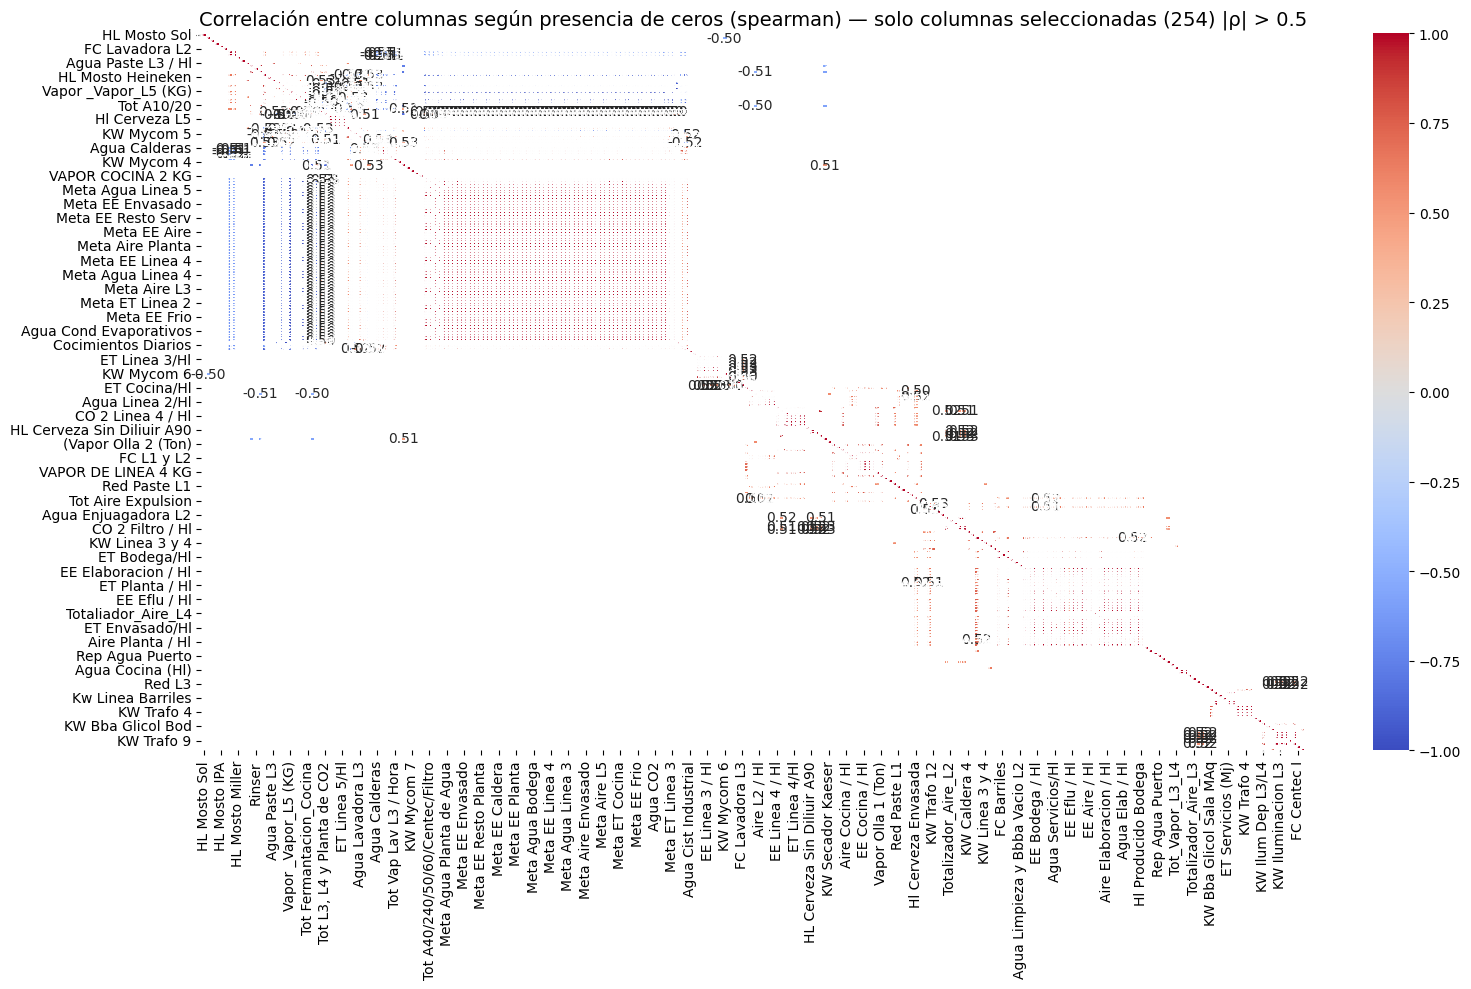

In [8]:
corr_zeros = matriz_correlacion_ceros(df, columnas=cols_ceros_array, metodo="spearman", umbral=0.5)


In [9]:
def separar_columnas_por_correlacion(corr_matrix, columnas, umbral=0.5):
    """
    Dada una matriz de correlaciones y una lista de columnas,
    devuelve dos listas:
      - columnas sin correlaciones altas (|ρ| < umbral)
      - columnas con correlaciones altas (|ρ| >= umbral)
    """
    cols_sin_corr = []
    cols_con_corr = []

    for col in columnas:
        # Obtener correlaciones absolutas con las demás (excluyendo consigo misma)
        correlaciones = corr_matrix.loc[col, columnas].drop(col).abs()
        # Ver si alguna supera el umbral
        if (correlaciones >= umbral).any():
            cols_con_corr.append(col)
        else:
            cols_sin_corr.append(col)

    return cols_sin_corr, cols_con_corr

# --- Uso ---
cols_sin_corr, cols_con_corr = separar_columnas_por_correlacion(
    corr_zeros,
    cols_ceros_array,
    umbral=0.5
)

print(f"🟢 Columnas SIN correlaciones altas: {len(cols_sin_corr)}")
print(f"🔴 Columnas CON correlaciones altas: {len(cols_con_corr)}")


🟢 Columnas SIN correlaciones altas: 49
🔴 Columnas CON correlaciones altas: 205


Antes de comenzar con la imputación, partiremos el dataset en train y test y analizaremos los outliers.

In [10]:
from sklearn.model_selection import train_test_split


test_size = 0.3
split_index = int(len(df) * (1 - test_size))

train_df = df.iloc[:split_index]
test_df  = df.iloc[split_index:]

X_train = train_df.drop(columns=['Frio (Kw) tomorrow'])
y_train = train_df['Frio (Kw) tomorrow']

X_test = test_df.drop(columns=['Frio (Kw) tomorrow'])
y_test = test_df['Frio (Kw) tomorrow']


print("✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")


✅ División completada:
X_train: (828, 316)
X_test:  (356, 316)
y_train: (828,)
y_test:  (356,)


In [11]:
# Asegurarse de usar solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])

# Calcular z-score absoluto
z_scores = np.abs(stats.zscore(X_train_num, nan_policy='omit'))

# Convertir a DataFrame para facilitar análisis
z_scores_df = pd.DataFrame(z_scores, columns=X_train_num.columns, index=X_train_num.index)


umbral = 3.0

# Máscara booleana: True donde hay outliers
outliers_mask = (z_scores_df > umbral)

# Cuántos outliers tiene cada columna
outliers_por_col = outliers_mask.sum().sort_values(ascending=False)

print("🔹 Cantidad de outliers por columna:")
print(outliers_por_col[outliers_por_col > 0])




🔹 Cantidad de outliers por columna:
Retorno Planta CO2                 48
HL Mosto Amstel Lager              39
 HL Mosto Golden                   37
HL Mosto IPA                       37
HL Mosto Heineken                  32
KW Atlas 3                         31
Temp Tq Intermedio                 31
Aire L2 / Hl                       25
KW Secador Kaeser                  24
EE Linea 2 / Hl                    24
VAPOR DE CALDERA 3 KG              24
CO 2 linea 3 / Hl                  23
Agua Linea 2/Hl                    23
HL Mosto Sol                       22
KW Enfr Agua Cocina                21
Kw Casona                          21
Tot Vap Paste L3 / Hora            20
Totalizador_L3                     19
Tot L3, L4 y Planta de CO2         18
Tot Fermantacion_Cocina            18
FC Lavadora L2                     16
Tot Aire Servicio Logistica        16
Tot  Reposo Superior               16
FC Lavadora L3                     16
Red Paste L3                       16
CO 2 Filtro / 

Ahora sí, a imputar.

In [12]:
# 1️⃣ Columnas con ceros (que querés imputar)
cols_con_ceros = columnas_con_ceros(X_train)
cols_ceros_array = cols_con_ceros.index.to_list()
cols = cols_ceros_array  # las columnas que querés imputar (lista)

# --- Train: reemplazo ceros -> NaN e interpolación usando solo pasado
X_train_temp = X_train.copy()
X_train_temp[cols] = X_train_temp[cols].replace(0, np.nan)

X_train_imputado = X_train_temp.copy()
X_train_imputado[cols] = (
    X_train_temp[cols]
        .interpolate(method='linear', limit_direction='forward')  # usa solo pasado
        .ffill()  # si queda NaN al inicio del train
)

# --- Test: reemplazo ceros -> NaN
X_test_temp = X_test.copy()
X_test_temp[cols] = X_test_temp[cols].replace(0, np.nan)

# Conseguir el último registro válido del train (por columna)
last_train_row = X_train_imputado[cols].ffill().iloc[[-1]]  # dataframe 1xNcols

# Concatenamos ese "último valor conocido" + test, interpolamos y descartamos la fila semilla
prep = pd.concat([last_train_row, X_test_temp[cols]], ignore_index=True)
prep_imputado = prep.interpolate(method='linear', limit_direction='forward').ffill()
# Quitamos la fila 0 (la semilla) y restauramos índices
prep_imputado = prep_imputado.iloc[1:].reset_index(drop=True)

# Asignamos de vuelta a X_test (manteniendo el resto de columnas)
X_test_imputado = X_test.copy()
X_test_imputado.loc[:, cols] = prep_imputado.values

# Resultado: X_train_imputado, X_test_imputado


⚠️ Columnas con valores cero:


FEATURE ENGINEERING

In [13]:
df["Frio (Kw)_movil_5"] = df["Frio (Kw)"].rolling(window=5, min_periods=1).mean()
df["finde"] = df["Dia_semana"].isin(["Sabado", "Domingo"]).astype(int)
print(df[['Frio (Kw)', 'Frio (Kw)_movil_5']])
df = df.iloc[5::]
print(df.shape)
#print("Frío primeras 5 filas: ", df.iloc[0:4]['Frio (Kw)'])
#print("Prom movil primeras 5 filas: ", df.iloc[0:4]['Frio (Kw)_movil_5'])
#print("-----")
#print("Frío últimas 5 filas: ", df.iloc[-5:-1]['Frio (Kw)'])
#print("Prom movil últimas 5 filas: ", df.iloc[-5:-1]['Frio (Kw)_movil_5'])

      Frio (Kw)  Frio (Kw)_movil_5
0       14325.0       1.432500e+04
1       23954.0       1.913950e+04
2       28268.0       2.218233e+04
3       24246.0       2.269825e+04
4       29885.0       2.413560e+04
5       24449.0       2.616040e+04
6       24435.0       2.625660e+04
7       33401.0       2.728320e+04
8       30921.0       2.861820e+04
9       27721.0       2.818540e+04
10      29046.0       2.910480e+04
11      35721.0       3.136200e+04
12      31017.0       3.088520e+04
13      34753.0       3.165160e+04
14      26648.0       3.143700e+04
15      27628.0       3.115340e+04
16      26595.0       2.932820e+04
17      30933.0       2.931140e+04
18      34890.0       2.933880e+04
19      33155.0       3.064020e+04
20      33436.0       3.180180e+04
21      38249.0       3.413260e+04
22      40886.0       3.612320e+04
23      33644.0       3.587400e+04
24      30355.0       3.531400e+04
25      36679.0       3.596260e+04
26      31448.0       3.460240e+04
27      33549.0     

In [14]:
def agregar_ratios(df):
    """
    Agrega columnas de ratios energéticos entre áreas principales.
    Requiere que las columnas base estén en el DataFrame.
    """

    df = df.copy()

    # --- Ratios respecto a Planta ---
    df["ratio_SalaMaq_Planta"] = df["Sala Maq (Kw)"] / df["Planta (Kw)"]
    df["ratio_Servicios_Planta"] = df["Servicios (Kw)"] / df["Planta (Kw)"]
    df["ratio_Produccion_Planta"] = df["Produccion (Hl)"] / df["Planta (Kw)"]

    # --- Ratios respecto a Producción ---
    df["ratio_SalaMaq_Produccion"] = df["Sala Maq (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Servicios_Produccion"] = df["Servicios (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Planta_Produccion"] = df["Planta (Kw)"] / df["Produccion (Hl)"]
    df["ratio_Cocina_Produccion"] = df["Cocina (Kw)"] / df["Produccion (Hl)"]

    # --- Ratios específicos adicionales ---
    df["ratio_Cocina_SalaMaq"] = df["Cocina (Kw)"] / df["Sala Maq (Kw)"]
    df["ratio_Cocina_Servicios"] = df["Cocina (Kw)"] / df["Servicios (Kw)"]
    df["ratio_Servicios_SalaMaq"] = df["Servicios (Kw)"] / df["Sala Maq (Kw)"]

    # Evitar infinitos o NaN si alguna división tiene 0
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df


# 🧪 Ejemplo de uso:
#df = agregar_ratios(df)


Nos quedaremos con las 15 variables más correlacionadas con la target y haremos un PolynomialFeatures sobre ellas.

In [15]:
target = "Frio (Kw) tomorrow" 

# --- 1️⃣ Calcular correlaciones ---
corr_spearman = df.corr(method="spearman", numeric_only=True)
corr_target = corr_spearman[target].drop(target).sort_values(ascending=False)

# 🔹 Seleccionar las 15 más correlacionadas (en valor absoluto)
top15 = corr_target.abs().sort_values(ascending=False).head(15)
top15 = corr_target.loc[top15.index]  # mantener signo original

print("🔝 Top 15 variables más correlacionadas con el target:")
print(top15)

🔝 Top 15 variables más correlacionadas con el target:
Frio (Kw)              0.813897
Frio (Kw)_movil_5      0.795767
Sala Maq (Kw)          0.792018
Servicios (Kw)         0.787623
KW Gral Planta         0.755276
Planta (Kw)            0.751506
Agua Planta (Hl)       0.694490
Planta de agua (Hl)    0.688672
Tarifa_electrica       0.688345
KW Cond 5. 6 y 9       0.668025
Produccion (Hl)        0.648732
ET Bodega/Hl          -0.626208
KW Mycom 7             0.616762
ET Servicios / Hl     -0.615212
Agua Cond REC          0.612997
Name: Frio (Kw) tomorrow, dtype: float64


In [16]:
from sklearn.preprocessing import PolynomialFeatures

def generar_features_polinomicos(df, columnas_numericas, grado=2, incluir_bias=False):
    """
    Genera características polinómicas a partir de las columnas numéricas del DataFrame.

    Parámetros:
        df: DataFrame original.
        columnas_numericas: lista de columnas sobre las cuales generar los polinomios.
        grado: grado del polinomio (por defecto 2).
        incluir_bias: si True, incluye una columna de 1s.

    Retorna:
        DataFrame con las nuevas columnas polinómicas y las originales .
    """

    # Seleccionamos las columnas numéricas elegidas
    df_num = df[columnas_numericas]

    # Generamos las features polinómicas
    poly = PolynomialFeatures(degree=grado, include_bias=incluir_bias)
    arr_poly = poly.fit_transform(df_num)

    # Nombres de las nuevas columnas
    nombres_poly = poly.get_feature_names_out(columnas_numericas)

    # DataFrame con las columnas polinómicas
    df_poly = pd.DataFrame(arr_poly, columns=nombres_poly, index=df.index)

    # Si queremos mantener las originales, concatenamos
    # Evitamos duplicar columnas que ya existían (como las de grado 1)
    nuevas_columnas = [c for c in df_poly.columns if c not in df.columns]
    df_resultado = pd.concat([df, df_poly[nuevas_columnas]], axis=1)
    return df_resultado


# 🧪 Ejemplo de uso:
#df = generar_features_polinomicos(df, top15.index.tolist(), grado=2)
#print(df.shape)



Todas estas columnas que añadimos nos trajeron problemáticas de outliers y nans que debemos solucionar. Por ello, repetiremos lo utilizado previamente.

In [17]:
# Separar variables independientes (X) y dependiente (y)
X = df.drop(columns=['Frio (Kw) tomorrow'])
y = df['Frio (Kw) tomorrow']

test_size = 0.3
split_index = int(len(df) * (1 - test_size))

train_df = df.iloc[:split_index]
test_df  = df.iloc[split_index:]

X_train = train_df.drop(columns=['Frio (Kw) tomorrow'])
y_train = train_df['Frio (Kw) tomorrow']

X_test = test_df.drop(columns=['Frio (Kw) tomorrow'])
y_test = test_df['Frio (Kw) tomorrow']


print("✅ División completada:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

# Asegurarse de usar solo columnas numéricas
X_train_num = X_train.select_dtypes(include=[np.number])

# Calcular z-score absoluto
z_scores = np.abs(stats.zscore(X_train_num, nan_policy='omit'))

# Convertir a DataFrame para facilitar análisis
z_scores_df = pd.DataFrame(z_scores, columns=X_train_num.columns, index=X_train_num.index)


umbral = 3.0

# Máscara booleana: True donde hay outliers
outliers_mask = (z_scores_df > umbral)

# Cuántos outliers tiene cada columna
outliers_por_col = outliers_mask.sum().sort_values(ascending=False)

print("🔹 Cantidad de outliers por columna:")
print(outliers_por_col[outliers_por_col > 0])

# 1️⃣ Columnas con ceros (que querés imputar)
cols_con_ceros = columnas_con_ceros(X_train)
cols_ceros_array = cols_con_ceros.index.to_list()
cols = cols_ceros_array  # las columnas que querés imputar (lista)

# --- Train: reemplazo ceros -> NaN e interpolación usando solo pasado
X_train_temp = X_train.copy()
X_train_temp[cols] = X_train_temp[cols].replace(0, np.nan)

X_train_imputado = X_train_temp.copy()
X_train_imputado[cols] = (
    X_train_temp[cols]
        .interpolate(method='linear', limit_direction='forward')  # usa solo pasado
        .ffill()  # si queda NaN al inicio del train
)

# --- Test: reemplazo ceros -> NaN
X_test_temp = X_test.copy()
X_test_temp[cols] = X_test_temp[cols].replace(0, np.nan)

# Conseguir el último registro válido del train (por columna)
last_train_row = X_train_imputado[cols].ffill().iloc[[-1]]  # dataframe 1xNcols

# Concatenamos ese "último valor conocido" + test, interpolamos y descartamos la fila semilla
prep = pd.concat([last_train_row, X_test_temp[cols]], ignore_index=True)
prep_imputado = prep.interpolate(method='linear', limit_direction='forward').ffill()
# Quitamos la fila 0 (la semilla) y restauramos índices
prep_imputado = prep_imputado.iloc[1:].reset_index(drop=True)

# Asignamos de vuelta a X_test (manteniendo el resto de columnas)
X_test_imputado = X_test.copy()
X_test_imputado.loc[:, cols] = prep_imputado.values

# Resultado: X_train_imputado, X_test_imputado


✅ División completada:
X_train: (825, 318)
X_test:  (354, 318)
y_train: (825,)
y_test:  (354,)
🔹 Cantidad de outliers por columna:
Retorno Planta CO2                 69
HL Mosto Amstel Lager              38
 HL Mosto Golden                   37
HL Mosto IPA                       36
HL Mosto Heineken                  32
KW Atlas 3                         31
Temp Tq Intermedio                 27
Aire L2 / Hl                       25
VAPOR DE CALDERA 3 KG              24
KW Secador Kaeser                  24
Agua Linea 2/Hl                    23
EE Linea 2 / Hl                    23
CO 2 linea 3 / Hl                  23
HL Mosto Sol                       22
KW Enfr Agua Cocina                21
Totalizador_L3                     19
Tot Vap Paste L3 / Hora            19
Tot L3, L4 y Planta de CO2         18
Tot Fermantacion_Cocina            18
Kw Casona                          18
Red Paste L3                       16
FC Lavadora L2                     16
FC Lavadora L3                   

Usamos .get_dummies para aplicar One-Hot a las variables categóricas

In [18]:
def aplicar_get_dummies(X_train, X_test):
    """
    Aplica pd.get_dummies a X_train y X_test garantizando que ambos 
    tengan las mismas columnas (alineadas correctamente).

    Retorna:
        X_train_dum, X_test_dum
    """
    # Concatenamos para aprender todas las categorías posibles
    df_combinado = pd.concat([X_train, X_test], axis=0)

    # Generamos las variables dummies
    df_dummies = pd.get_dummies(df_combinado, drop_first=True)

    # Separamos nuevamente en train y test
    X_train_dum = df_dummies.iloc[:len(X_train), :].copy()
    X_test_dum = df_dummies.iloc[len(X_train):, :].copy()

    return X_train_dum, X_test_dum

X_train_dum, X_test_dum = aplicar_get_dummies(X_train, X_test)

print(X_train_dum.shape, X_test_dum.shape)


(825, 325) (354, 325)


Como nos quedaron múltiples columnas, veamos con LASSO y Feature Importances qué podemos sacarnos de encima.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def importancia_variables_rf(X_train, y_train, n_estimators=300, max_depth=None, random_state=42):
    """
    Entrena un Random Forest y devuelve un DataFrame con la importancia de variables.
    """
    # ⚖️ Escalado no es obligatorio para RF, pero puede ayudar si las magnitudes son muy distintas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # 🌲 Entrenamos el modelo
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    rf.fit(X_scaled, y_train)

    # 📊 Importancia de las variables
    importancias = pd.DataFrame({
        'variable': X_train.columns,
        'importancia': rf.feature_importances_
    }).sort_values(by='importancia', ascending=False)

    # 🧩 Mostramos el top 15
    print("\nTop 15 variables más importantes:")
    display(importancias.head(15))

    return rf, importancias


In [20]:
#modelo_rf, importancia_df = importancia_variables_rf(X_train_dum, y_train)

In [21]:
def graficar_importancia(importancias, top_n=15):
    top = importancias.head(top_n).sort_values(by='importancia')
    plt.figure(figsize=(8, 6))
    plt.barh(top['variable'], top['importancia'])
    plt.title(f'Top {top_n} variables más importantes (Random Forest)')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

# 🪄 Ejemplo:
#graficar_importancia(importancia_df, top_n=50)


In [22]:
#top_50_vars = importancia_df.head(50)['variable'].tolist()

#X_train_top50 = X_train_dum[top_50_vars].copy()

#print(f"✅ Quedaste con {X_train_top50.shape[1]} variables importantes.")
#X_train_top50.head()


In [23]:
from sklearn.linear_model import Lasso

# Supongamos que tu target es y_train
# Escalamos los datos porque Lasso es sensible a la escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dum)

# Definimos el modelo Lasso
# Ajusta alpha según la regularización que quieras
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_train)

# Obtenemos coeficientes
coef = pd.Series(lasso.coef_, index=X_train_dum.columns)

# Mostramos importancia absoluta ordenada
importancia = coef.abs().sort_values(ascending=False)
print(importancia)

# Opcional: filtrar solo variables con coef != 0
variables_relevantes = coef[coef != 0].sort_values(key=abs, ascending=False)
print(variables_relevantes)


Hl Cerveza Cocina                  2.463938e+05
Meta Produccion Agua               2.157634e+05
Medicion Gas Planta (M3)           1.936291e+05
Meta EE Elaboracion                1.915429e+05
Gas Planta (Mj)                    1.355378e+05
Agua Linea 5/Hl                    1.345273e+05
Aire L5 / Hl                       1.323108e+05
Planta (Kw)                        1.228770e+05
Agua Cond Evaporativos             1.141103e+05
HL Mosto Tecate                    1.137488e+05
ET Planta / Hl                     1.084323e+05
Hl de Mosto                        1.069338e+05
Agua Envas / Hl                    1.059128e+05
EE Resto Planta / Hl               1.017088e+05
Meta ET Planta                     1.014270e+05
Aire Elaboracion / Hl              1.009097e+05
KW Linea 3 y 4                     9.430964e+04
EE Linea 4 / Hl                    9.116523e+04
ET Envasado/Hl                     8.921162e+04
EE Resto Serv / Hl                 8.786849e+04
KW Trafo 9                         8.382

c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+13, tolerance: 3.121e+09
  model = cd_fast.enet_coordinate_descent(


c:\Users\franc\Desktop\MostoElMostro\MostoElMostro\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+13, tolerance: 3.121e+09
  model = cd_fast.enet_coordinate_descent(


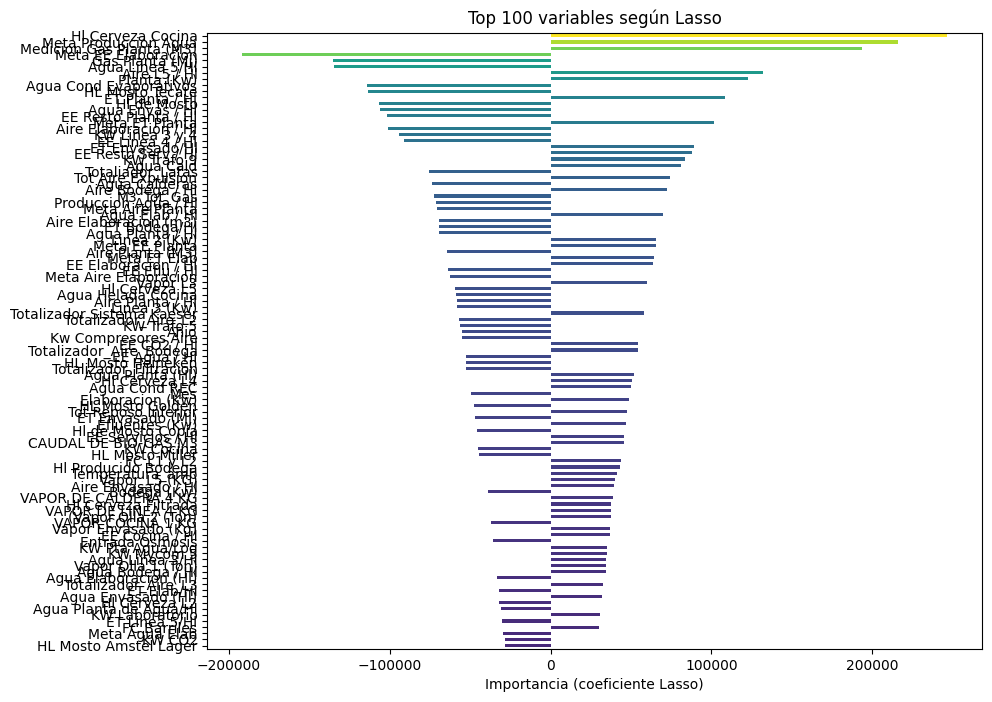

In [24]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dum)

# Convertimos a DataFrame para poder indexar con nombres
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train_dum.columns, index=X_train_dum.index)

# Ajustamos Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled_df, y_train)

# Coeficientes como Series
coef = pd.Series(lasso.coef_, index=X_scaled_df.columns)

# Top 100 absolutos
top100 = coef.abs().sort_values(ascending=False).head(100)

# Recuperar con signo
top100_signed = coef[top100.index].sort_values(key=abs, ascending=True)

# Gráfico
plt.figure(figsize=(10,8))
top100_signed.plot(kind='barh', color=plt.cm.viridis(np.abs(top100_signed) / np.abs(top100_signed).max()))
plt.xlabel('Importancia (coeficiente Lasso)')
plt.title('Top 100 variables según Lasso')
plt.show()


In [25]:
# Filtrar dataframe escalado
top100_vars = top100_signed.index.tolist()
X_train_top100 = X_scaled_df[top100_vars].copy()

print(f"✅ Quedaste con {X_train_top100.shape[1]} variables importantes")
print(X_train_top100.shape)

✅ Quedaste con 100 variables importantes
(825, 100)


Aparenta tener bastante sentido quedarnos con este conjunto de variables para trabajar. No dejan de ser productos entre el promedio móvil de la variable de Frío y las features con mayor correlación a la misma.